In [1]:
using LinearAlgebra
using Plots
include("polynodes.jl")
include("aux_hfd.jl")
include("hfdTypes.jl")
include("postprocess.jl")

Main.HfdPostProcess

In [2]:
occ = Dict(
    -1 => [2 2 2 2 2 2], #s1/2
    1  => [2 2 2 2 2],   #p1/2
    -2 => [4 4 4 4 4],   #p3/2
    2  => [4 4 4],     #d3/2
    -3 => [6 6 6],     #d5/2
    3  => [6 1], #f5/2
    -4 => [8]
    )
#occ = Dict(-1 => [2 2],
#            1 => [2],
#            -2 => [4])
#occ = Dict(-1 => [2])
N, Nprec=157, 250
Z=90e0
grid = hfd_funcs.leg_rat_grid(N, 1e0)
#grid_prec = hfd_funcs.leg_exp_grid(Nprec, grid.xs[end])
cpars = hfd_funcs.CalcParams(Z, length(grid.xs);scale =0.5, alpha=1e-8)
cpars = hfd_funcs.CalcParams(Z, length(grid.xs);scale =0.5)
#cpars_prec = hfd_funcs.CalcParams(Z, length(grid_prec.xs))
@show(N=length(grid.xs))
occ_block, ztot = hfd_funcs.from_dict(occ, Float64, N)
println("Ztot=$ztot, sum_occs = $(sum(occ_block.occs))")
@time hfd_funcs.hcore_calc!(cpars, grid, occ_block)
@time hs = hfd_funcs.sc_coul_calc!(cpars, grid, occ_block; tol=1e-5, dump=0.5, maxiter=20, rc_hard=50);

N = length(grid.xs) = 157
Ztot=92.0, sum_occs = 87.0
+=========================================================
|Starting calc_occ iterations                             
|atomic charge: 90.0
!atomic scale: 0.5 a.e
|fine structure constant: 0.0072973525643
|number of nodes in radial grid: 157
|maximal iteration number: 3
|tolerance: 1.0e-6
|dumping: 0.5 
| maximal rcut: 30.0 a.e.
|aitken accelerated: false
|non-interacting electrons approximation


+=========================================================
iter no: 1
κ      |δpot|
-4  0.0
-3  0.0
-2  0.0
-1  0.0
1  0.0
2  0.0
3  0.0
orbital energies:
[-4617.757547953924, -1192.289213460733, -512.1999907855129, -280.9389723531045, -176.6673346825084, -121.13852759377, -1192.2892134608098, -512.199990785491, -280.9389723530697, -176.66733468246417, -121.1385275937849, -467.18248660941674, -262.1737440429274, -167.17418379442563, -1041.374504800456, -467.18248660957596, -262.1737440428364, -167.17418379440286, -115.69921458679528, -455.52

In [3]:
rep = HfdPostProcess.report(cpars, grid, occ_block; sortBy=:rhoav)

25×6 Matrix{Float64}:
 -1.0  1.0  -3999.99      1.0  0.0141456  0.000280335
  1.0  2.0   -709.486     1.0  0.0478055  0.00289059
 -2.0  1.0   -585.832     1.0  0.0577568  0.0040657
 -1.0  2.0   -737.754     1.0  0.0587761  0.00416277
  2.0  2.0   -123.909     1.0  0.140301   0.0231048
  1.0  3.0   -171.848     1.0  0.144317   0.0243986
 -3.0  1.0   -118.157     1.0  0.14563    0.0247634
 -1.0  3.0   -184.39      1.0  0.153249   0.02703
 -2.0  2.0   -143.662     1.0  0.162339   0.0306285
  1.0  4.0    -40.8359    1.0  0.33403    0.127203
 -1.0  4.0    -46.3455    1.0  0.334831   0.126775
  2.0  3.0    -24.86      1.0  0.369644   0.157653
 -2.0  3.0    -33.5939    1.0  0.37104    0.15645
  3.0  2.0    -12.1267    1.0  0.374908   0.165597
 -4.0  1.0    -11.7944    1.0  0.380561   0.170485
 -3.0  2.0    -23.5345    1.0  0.380875   0.16712
 -1.0  5.0    -10.6834    1.0  0.706215   0.558121
  1.0  5.0     -8.60549   1.0  0.739068   0.614103
 -2.0  4.0     -6.94172   1.0  0.821548   0.758512


In [4]:
#cpars = hfd_funcs.CalcParams(Z, length(grid.xs);scale =0.5)
@time hfd_funcs.hfd_calc!(cpars, grid, occ_block; tol=1e-5, dump=0.3,
    maxiter=40, ecp=nothing, rc_hard=100);

+=========================================================
|Starting calc_occ iterations                             
|atomic charge: 90.0
!atomic scale: 0.5 a.e
|fine structure constant: 0.0072973525643
|number of nodes in radial grid: 157
|maximal iteration number: 40
|tolerance: 1.0e-5
|dumping: 0.3 
| maximal rcut: 100 a.e.
|aitken accelerated: false
|Dirac Hartree Fock


+=========================================================
iter no: 1
κ      |δpot|
-4  0.5808205419580886
-3  0.5799960378270367
-2  0.5797171391034003
-1  0.5800842691162524
1  0.5802950553358837
2  0.5802423708513901
3  0.580855165239318
orbital energies:
[-4069.3074040347865, -763.5583656470651, -196.27354329994682, -52.17416170694687, -12.740284613168551, -2.9049360963430453, -734.2467343260257, -183.18794301974845, -46.29536840248205, -10.396501587699357, -2.145703025704707, -133.34613029249348, -29.165194725459532, -5.028351815361973, -607.6344550227345, -153.76671009552854, -38.534979791779406, -8.57848236

In [5]:
rep = HfdPostProcess.report(cpars, grid, occ_block; sortBy=:rhoav)

25×6 Matrix{Float64}:
 -1.0  1.0  -4064.7      1.0  0.0140819  0.000277871
  1.0  2.0   -730.588    1.0  0.0475207  0.00285666
 -2.0  1.0   -604.189    1.0  0.0574432  0.00402219
 -1.0  2.0   -760.12     1.0  0.0583868  0.00410939
  2.0  2.0   -130.924    1.0  0.139146   0.02273
  1.0  3.0   -180.772    1.0  0.143051   0.0239789
 -3.0  1.0   -124.968    1.0  0.144442   0.0243661
 -1.0  3.0   -193.949    1.0  0.151815   0.0265376
 -2.0  2.0   -151.504    1.0  0.160873   0.0301045
  1.0  4.0    -44.9711   1.0  0.330359   0.124251
 -1.0  4.0    -50.8696   1.0  0.331127   0.123842
  2.0  3.0    -27.9412   1.0  0.363211   0.152053
 -2.0  3.0    -37.3311   1.0  0.364918   0.151295
  3.0  2.0    -14.1571   1.0  0.36689    0.157939
 -4.0  1.0    -13.7921   1.0  0.372358   0.162531
 -3.0  2.0    -26.517    1.0  0.373909   0.160898
 -1.0  5.0    -12.1972   1.0  0.702365   0.550869
  1.0  5.0     -9.87644  1.0  0.734221   0.604835
 -2.0  4.0     -8.12599  1.0  0.80904    0.733958
  2.0  4.0     -

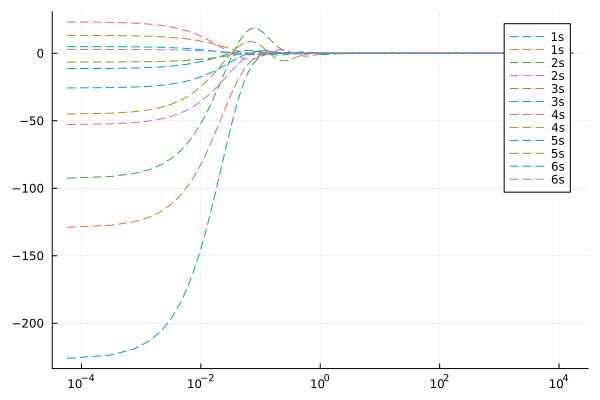

In [6]:
ds_inds = findall(occ_block.ks .== -1)
pqs = reshape(occ_block.vecs, cpars.N, 2, :)
plot()
for ii  in ds_inds
    plot!(grid.xs, pqs[:, :, ii]; xaxis=:log, label="$(occ_block.inds[ii])s", ls=:dash)
end
s_inds = findall(occ_block.ks .== -1)
for ii  in s_inds
#    plot!(grid.xs, pqs[:, :, ii]; xaxis=:log, label="$(occ_block.inds[ii])s", ls=:dot)
end
plot!()

In [7]:
include("recp.jl")
using .GausECP
#thorium gatchina sorep
lblk = ECPL{Float64}[]
soblk = ECPL{Float64}[]
Nel=60
GausECP.perm = [2, 1, 3]
#g
@ecp_blk lblk begin
   @_r 1   369.8978298568705  40.16886253269473      
   @_r 1   247.7655967328015  -75.84009176329934     
   @_r 2   201.1047071613469  1119.125617920092      
   @_r 2   149.6430016109879  -939.0212475237521     
   @_r 2   46.40820345015272  -158.9114782932650     
   @_r 2   33.21312110133701  54.34909097838379      
   @_r 2   23.27924832096906  -103.6155449221933     
   @_r 2   12.09743694899417  -21.48789486173877     
   @_r 2   6.715425102871503  -4.623176391720361     
   @_r 2   3.730670044853590  -0.4213014368523368    
   @_r 2   0.8740604208344924 -0.003534684399246564  
   @_r 2   0.5314586854464713  0.001299722959599601   
   @_r 2  0.3179053680475783  -0.0004241195633460222 
   @_r 2  0.06633123162449400 -0.0000170656793415232 
   @_r 2  0.01903637830471969 -0.00000304647146344   
   @_r 2  0.00757421576127823  0.00000050372193806137
end
# s-g 
@ecp_blk lblk begin
    @_r 0   185.6149912515295 10.00000000000000     
    @_r 1   72.69610545712889 1665.689924021051     
    @_r 1   50.62045400423052 -3162.409396416129    
    @_r 1   24.45651582576285 1544.845564349067     
    @_r 2   45.06701004657874 16686.03567120683     
    @_r 2   32.36396577224573 -22838.98909531935    
    @_r 2   23.47349275167025 17122.97056990629     
    @_r 2   17.00920816888125 -16493.01164388738    
    @_r 2   12.26004990448464 11122.52061428159     
    @_r 2   8.807471578860797 -5533.354025347027    
    @_r 2   6.303487518002028 2410.702817836725     
    @_r 2   4.481012333236060 -951.2552942569200    
    @_r 2   3.153715771217396 342.8842981647795     
    @_r 2   2.192760596053603 -112.5329043970451    
    @_r 2   1.503349725543504 32.74766569384701     
    @_r 2   1.015838734318231 -8.158457770475707    
    @_r 2  0.6773386777799915 1.638261011146533     
    @_r 2  0.4466685408353236 -0.2396255447741682   
    @_r 2  0.2906293427699985 0.01796864033091383   
end
# p-g
@ecp_blk lblk begin
    @_r 0   33.62238419942047 9.000000000000000     
    @_r 1   108.6498486022663 -10.46019428867366    
    @_r 1   63.44250624455074 32.08300662043577     
    @_r 1   37.52508190865536 50.96372440818211     
    @_r 1   23.82350781478851 -145.7224290972364    
    @_r 1   14.22396131155888 119.5147818145800     
    @_r 2   17.24977873563996 1296.825444132255     
    @_r 2   12.19266888096508 -2669.812590135937    
    @_r 2   8.799452270859081 2764.041714910161     
    @_r 2   6.404530227360024 -1592.803841628649    
    @_r 2   4.597933752868387 655.5382878557463     
    @_r 2   3.234766507524786 -209.3159924852027    
    @_r 2   2.230603879291048 52.28808778782674     
    @_r 2   1.487030742905809 -8.966073167810514    
    @_r 2  0.7071096553715204 0.8286892608803853    
    @_r 2  0.3868823593052261 -0.2886767134096632   
    @_r 2  0.2269164855314651 0.1169487079179529    
    @_r 2  0.1375627354920235 -0.03939634409199136  
    @_r 2  0.08461830731999777 0.008992871924271117  
    @_r 2  0.05210021826897759 -0.00099381933511903  
 end
# d-g 
 @ecp_blk lblk begin
    @_r 0   47.06500063635141 7.000000000000000     
    @_r 1   44.66520847650405 44.85949273482708     
    @_r 2   21.41550252318060 283.8219406110202     
    @_r 2   5.670309118951019 180.1522228445649     
    @_r 2   4.051741257216365 -103.0854170906906    
    @_r 2   2.643819122344593 31.90114097238834     
    @_r 2   1.675404711618865 -9.788433414920108    
    @_r 2   1.119651677234224 3.076109154372566     
    @_r 2  0.7541755684891658 -0.6618044699545529   
    @_r 2  0.5018690850074761 0.07279472517192705   
 end
# f-g 
 @ecp_blk lblk begin
    @_r 0   43.59501069915380 4.000000000000000     
    @_r 1   27.48912440563315 48.55730389037831     
    @_r 2   10.77953397751416 142.2668629080070     
    @_r 2   2.098519361892810 17.93453855508746     
    @_r 2   1.489976715732937 -15.59619347863963    
    @_r 2   1.050385280915063 6.045555431934109     
    @_r 2  0.7271425950222095 -1.108492314274378    
    @_r 2  0.4904561671557766 0.073022184973526     
end
# p  (spin-orbit block)
@ecp_blk soblk begin
   @_r 1   108.6498486022663 15.8595376383886      
   @_r 1   63.44250624455074 -57.9282704466573     
   @_r 1   37.52508190865536 188.489944250512      
   @_r 1   23.82350781478851 -296.319218785966     
   @_r 1   14.22396131155888 151.090348859407      
   @_r 2   17.24977873563996 734.528150816588      
   @_r 2   12.19266888096508 -1107.65428353211     
   @_r 2   8.799452270859081 351.427176769573      
   @_r 2   6.404530227360024 178.449923367313      
   @_r 2   4.597933752868387 -214.587357220606     
   @_r 2   3.234766507524786  110.07507547135      
   @_r 2   2.230603879291048 -36.8370144616061     
   @_r 2   1.487030742905809   7.64511898153745      
   @_r 2  0.7071096553715204  -0.852604493343653    
   @_r 2  0.3868823593052261   0.32081579970709      
   @_r 2  0.2269164855314651  -0.135747777160104    
   @_r 2  0.1375627354920235   0.0474315791702044   
   @_r 2  0.08461830731999777 -0.0112724135990633   
   @_r 2  0.05210021826897759  0.00132846203011996  
end
# d
@ecp_blk soblk begin
   @_r 1   44.66520847650405  0.1764443189192      
   @_r 2   21.41550252318060  1.03702955608837     
   @_r 2   5.670309118951019 -4.22010221346188     
   @_r 2   4.051741257216365  7.63154241364753     
   @_r 2   2.643819122344593 -3.54686064803607     
   @_r 2   1.675404711618865  1.1932506351607      
   @_r 2   1.119651677234224 -0.332820211264108    
   @_r 2  0.7541755684891658  0.0523377577591815   
   @_r 2  0.5018690850074761 -0.00299721541708748  
end
# f
@ecp_blk soblk begin
   @_r 1   27.48912440563315  0.0267313691710577  
   @_r 2   10.77953397751416 -0.22177840292743    
   @_r 2   2.098519361892810  0.150441559561692   
   @_r 2   1.489976715732937  0.0907210877371141  
   @_r 2   1.050385280915063 -0.155960593810341   
   @_r 2  0.7271425950222095  0.0608945288023855  
   @_r 2  0.4904561671557766 -0.00768349287561451 
end
# g
@ecp_blk soblk begin
    @_r 1   369.8978298568705 -0.291822910017576    
    @_r 1   247.7655967328015  1.00428644980751      
    @_r 2   201.1047071613469 -31.2916504753738     
    @_r 2   149.6430016109879 34.8567296943995      
    @_r 2   46.40820345015272 -2.42266148356078     
    @_r 2   33.21312110133701  3.46321455649292      
    @_r 2   23.27924832096906 -0.926468362145941    
    @_r 2   12.09743694899417  0.0991744884431113    
    @_r 2   6.715425102871503 -0.0177674528484214   
    @_r 2   3.730670044853590  0.000399051124467098  
    @_r 2  0.8740604208344924  0.000686241454240596  
    @_r 2  0.5314586854464713 -0.000183816056134132 
    @_r 2  0.3179053680475783  0.000076579223000822  
    @_r 2  0.0663312316244940  0.000003421032844457  
    @_r 2  0.0190363783047197 -0.000000127377276800 
    @_r 2  0.0075742157612782  0.000000136032665196 
end
ecp = RECP.ECPnum(Nel*0e0, lblk, soblk);

In [8]:
grid_ecp = hfd_funcs.leg_rat_grid(83, 1e0)
cpars_ecp = hfd_funcs.CalcParams(30e0, length(grid_ecp.xs);scale=1.0, alpha=1e-8)

Main.hfd_funcs.HfdTypes.CalcParams{Float64}(30.0, 83, 1.0, 1.0e-8)

In [9]:
occ_ecp = Dict(
    -1 => [2 2], #s1/2
    1 => [2 2],    #p1/2
    -2 => [4 4],   #p3/2
    2 => [4],    #d3/2
    -3 => [6],
    3 => [1]) #5s2 5p6 5d10 6s2 6p6 6d1
occ_block_ecp, ztot=hfd_funcs.from_dict(occ_ecp, Float64, length(grid_ecp.xs))
occ_block_ecp.inds[occ_block_ecp.ks .>0] .-= 1;

In [10]:
hfd_funcs.hcore_calc!(cpars_ecp, grid_ecp, occ_block_ecp; ecp=ecp)
hfd_funcs.sc_coul_calc!(cpars_ecp, grid_ecp, occ_block_ecp; ecp=ecp, tol=1e-4, dump=0.3);
hs = hfd_funcs.hfd_calc!(cpars_ecp, grid_ecp, occ_block_ecp;ecp=ecp, dump=0.7, maxiter=20, tol=1e-8);

+=========================================================
|Starting calc_occ iterations                             
|atomic charge: 30.0
!atomic scale: 1.0 a.e
|fine structure constant: 1.0e-8
|number of nodes in radial grid: 83
|maximal iteration number: 3
|tolerance: 1.0e-6
|dumping: 0.5 
| maximal rcut: 30.0 a.e.
|aitken accelerated: false
|non-interacting electrons approximation
semilocal ecp with 0.0 core electrons, lmax=4, nso = 5

+=========================================================
iter no: 1
κ      |δpot|
-3  0.0
-2  0.0
-1  0.0
1  0.0
2  0.0
3  0.0
orbital energies:
[-35.91580805603631, -21.590727782807043, -33.49593542933982, -20.432203484671263, -27.40057705503712, -31.14270137551313, -19.366685434753922, -26.964995511849647, -22.442753531633816]
+=========================================================
|Starting calc_occ iterations                             
|atomic charge: 30.0
!atomic scale: 1.0 a.e
|fine structure constant: 1.0e-8
|number of nodes in radial g

In [11]:
include("postprocess.jl")
HfdPostProcess.report(cpars_ecp, grid_ecp, occ_block_ecp;sortBy=:rhoav)

9×6 Matrix{Float64}:
 -1.0  1.0  -12.3376   1.0  0.726746  0.568538
  1.0  1.0   -9.96285  1.0  0.758227  0.622702
 -2.0  1.0   -8.20195  1.0  0.834353  0.754074
  2.0  1.0   -4.65701  1.0  0.940417  0.976127
 -3.0  1.0   -4.36419  1.0  0.967068  1.03201
  3.0  1.0   -1.06146  1.0  1.53367   2.80692
 -1.0  2.0   -2.73531  1.0  1.57781   2.76604
  1.0  2.0   -1.9998   1.0  1.73915   3.37467
 -2.0  2.0   -1.68129  1.0  1.94045   4.1972

In [12]:
rep[end-8:end, :]

9×6 Matrix{Float64}:
 -1.0  5.0  -12.1972   1.0  0.702365  0.550869
  1.0  5.0   -9.87644  1.0  0.734221  0.604835
 -2.0  4.0   -8.12599  1.0  0.80904   0.733958
  2.0  4.0   -4.63806  1.0  0.918758  0.959065
 -3.0  3.0   -4.34558  1.0  0.945488  1.015
  3.0  3.0   -1.05654  1.0  1.53008   2.8244
 -1.0  6.0   -2.73961  1.0  1.57222   2.75708
  1.0  6.0   -2.00487  1.0  1.73341   3.36293
 -2.0  5.0   -1.68319  1.0  1.93613   4.19048

In [225]:
lhs, rhs = hfd_funcs.dirac_h1(cpars_ecp, grid_ecp, 1)
hfd_funcs.lhs_rhs!(cpars_ecp, grid_ecp, -2, occ_block_ecp, lhs, rhs; ecp=ecp, 
    pot_func=hfd_funcs.hfd_pot)
eigs = eigen(lhs, rhs)
inds = findall(eigs.values .> -(cpars_ecp.Z * cpars_ecp.scale)^2)
eigs.values[inds][1:15]./(cpars_ecp.scale)^2

15-element Vector{Float64}:
 -8.20195177978398
 -1.6812943937843643
 -0.4574619399047078
 -0.2572876649390632
 -0.16637145399991132
 -0.1166715209639763
 -0.08641502447208393
 -0.06658779778457084
 -0.05287308077474845
 -0.042777910794294036
 -0.03355465734601221
 -0.024695712253132045
 -0.01954618299757744
 -0.014288594785950187
 -0.007949924086511276

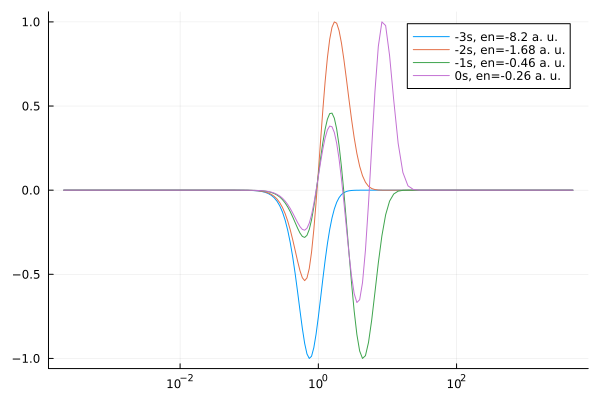

In [226]:
include("matutils.jl")
using .MatUtils
s_is = inds[dashInds(1:4)]
plot()
for s_i in s_is
    plot!(grid_ecp.xs.*cpars_ecp.scale, eigs.vectors[1:cpars_ecp.N, s_i].*(-1)^s_i; 
        xaxis=:log, label="$(s_i-61)s, en=$(round(eigs.values[s_i]./(cpars_ecp.scale)^2, digits=2)) a. u.")
end
plot!()

In [15]:
function aux_norm(cpars, grid, vecs, kappa)
    γ = hfd_funcs.gam(cpars, kappa)
    pqs = reshape(vecs, cpars.N, 2, :)
    an2 = cpars.alpha^2*cpars.Z^2
    res = zeros(eltype(vecs), size(pqs, 3), 2)
    for vi = 1:size(pqs, 3)
        dens = grid.xs.^(2γ) .* (pqs[:, 1, vi].^2 .+ an2 .* pqs[:, 2, vi].^2)
        res[vi, 1] = dot(grid.ws, dens)
        res[vi, 2] = dot(grid.ws, grid.xs .* dens)
    end
    res
end

aux_norm (generic function with 1 method)

In [16]:
nrs = aux_norm(cpars_ecp, grid_ecp, eigs.vectors[:, s_is], -1)
eigs.vectors[:, s_is] ./= sqrt.(nrs[:, 1]')
@views nrs ./= nrs[:, 1]
aux_norm(cpars_ecp, grid_ecp, eigs.vectors[:, s_is], -1)

4×2 Matrix{Float64}:
 1.0  0.726746
 1.0  1.57781
 1.0  3.79183
 1.0  7.13301

In [287]:
using Optim
include("gaus_opt.jl")
#using .GausOpt
#alphas = [0.007, 0.21787621815715946, 0.5767325910965153, 1.0084529311499264, 1.2507807620237346, 2.3917911517395245, 3.819534281236145, 5.045360520680296, 21.213203435596423]
active = Vector(1:length(alphas))
active = [1]
tgt = GausOpt.make_target(cpars_ecp, grid_ecp, alphas, 1, 
    eigs.vectors[1:cpars_ecp.N, s_is[3]]; active=active)
aux2 = optimize(tgt, zeros(length(active)))
alphas_new = GausOpt.scale(alphas, Optim.minimizer(aux2);active=active)
@show sort(alphas_new)
@show aux2
display([alphas alphas_new])
alphas = alphas_new;

sort(alphas_new) = [0.05278580516909103, 0.21787621815715946, 0.5767325910965153, 1.0084529311499264, 1.2507807620237346, 2.3917911517395245, 3.819534281236145, 5.045360520680296, 21.213203435596423]


aux2 =  * Status: success

 * Candidate solution
    Final objective value:     -9.992934e-01

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    9
    f(x) calls:    21



9×2 Matrix{Float64}:
  0.0527806   0.0527858
  0.217876    0.217876
  0.576733    0.576733
  1.00845     1.00845
  1.25078     1.25078
  2.39179     2.39179
  3.81953     3.81953
  5.04536     5.04536
 21.2132     21.2132

In [282]:
res = get_coefs(cpars_ecp, grid_ecp, alphas_new, 0, eigs.vectors[1:cpars_ecp.N, s_is].*grid_ecp.xs)
pvecs = GausOpt.make_proj_vecs(cpars_ecp, grid_ecp, res, alphas_new, 0)
[alphas_new res.coefs]

9×5 Matrix{Float64}:
  0.019799   0.000662403   -0.128318    -9.96043    -15.2753
  0.217876  -0.0159146     -4.24978      3.51305     45.1528
  0.576733   0.00533315     5.59236     10.5357    -222.769
  1.00845   -1.31688      -17.1672     -56.7725     909.121
  1.25078    0.980483      18.1755      59.0336    -919.316
  2.39179   -1.47424       -6.06154    -25.3584     363.021
  3.81953    2.14467        3.91609     20.856     -286.147
  5.04536   -0.794111      -1.81782     -8.80186    121.014
 21.2132    -0.0237206      0.0669075    0.153438    -2.29628

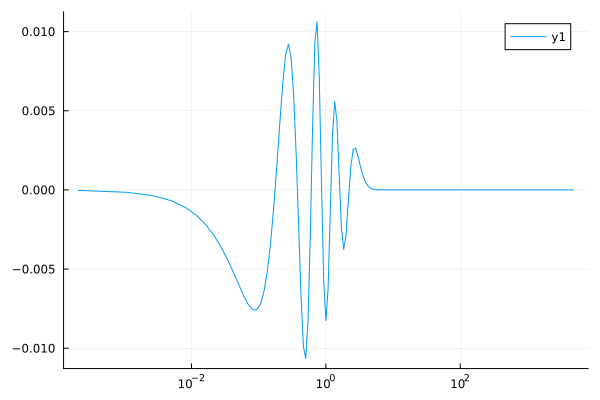

In [266]:
plot(grid_ecp.xs, [pvecs[:, 1].*grid_ecp.xs .- eigs.vectors[1:cpars_ecp.N, s_is[1]].*grid_ecp.xs]; xaxis=:log)

In [157]:
grid_ecp.ws' * (pvecs.*grid_ecp.xs).^2

1×4 adjoint(::Vector{Float64}) with eltype Float64:
 0.998146  0.99943  0.999749  0.514587

In [227]:
open("Th_gaus_ecp2.txt", "a") do io
    println(io, repr("text/plain", [alphas_new res.coefs]))
end

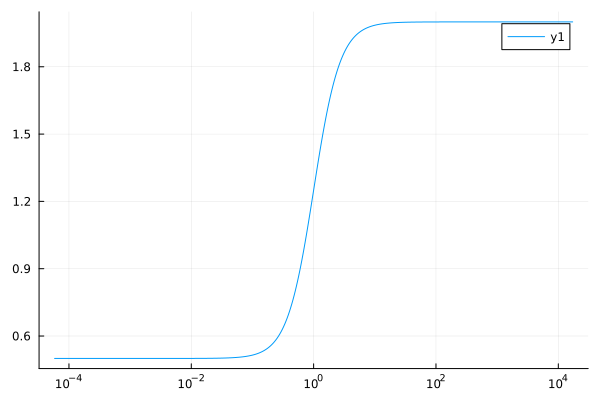

In [59]:
plot(grid.xs, 0.5 .+ 1.5*grid.xs.^2e0./(1 .+ grid.xs.^2);xaxis=:log)

nrm = 1.0
rho2 = 19.472504266964165
nrm = 0.8218495202408178
rho2 = 15.455421780159101
nrm = 0.7699213560540917
rho2 = 12.090961139622419
alphas = [0.09865616311504007, 0.0580882252251553, 0.03809287077520074]


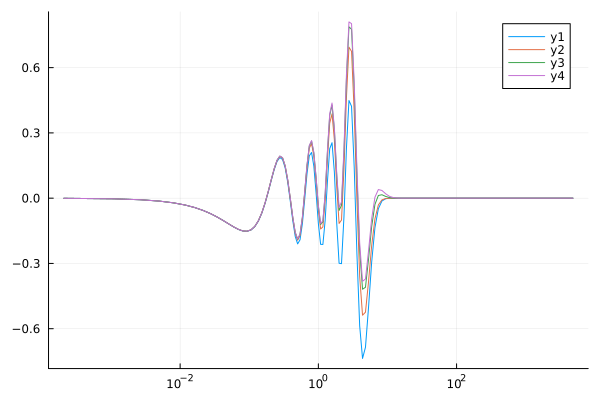

In [276]:
vec1 = eigs.vectors[1:cpars_ecp.N, s_is[2]].*grid_ecp.xs  - pvecs[:, 2].*grid_ecp.xs
#vec1 = eigs.vectors[1:cpars_ecp.N, s_is[1]]
vec1 ./= sqrt(dot(grid_ecp.ws, vec1.^2))
alphas = Float64[]
plot(grid_ecp.xs, vec1;xaxis=:log)
for iter=1:3
a, err = GausOpt.one_exp_vec!(cpars_ecp, grid_ecp, vec1, 1)
push!(alphas, a)
plot!(grid_ecp.xs, vec1;xaxis=:log)
end
@show alphas
plot!()

In [ ]:
res = get_coefs(cpars_ecp, grid_ecp, alphas, 0, eigs.vectors[1:cpars_ecp.N, s_is] .*grid_ecp.xs)
pvecs = make_proj_vecs(cpars_ecp, grid_ecp, res, alphas, 0)
[alphas res.coefs]

In [ ]:
plot(grid_ecp.xs, [pvecs[:, 1].*grid_ecp.xs eigs.vectors[1:cpars_ecp.N, s_is[1]].*grid_ecp.xs]; xaxis=:log)

In [ ]:
]add Optim